In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_absolute_error


In [6]:

def evaluate_linear_regression_plot_(df:pd.DataFrame, x="tr", y="predicted_rt", model_name = "base model"):
    ci=95
    n_sample=10000000
    if len(df) > n_sample:
        df = df.sample(n_sample, replace=False)
    gls = sm.GLS(df[y], sm.add_constant(df[x]))
    res = gls.fit()
    summary = res.summary(alpha=1-ci/100.0)
    dfs = []
    results_as_html = summary.tables[0].as_html()
    dfs.append(pd.read_html(results_as_html, index_col=None)[0])
    results_as_html = summary.tables[1].as_html()
    dfs.append(pd.read_html(results_as_html, index_col=None)[0])
    summary = pd.concat(dfs, ignore_index=True)
    R_square = float(summary.loc[0,3])
    R = np.sqrt(R_square)
    n,b,w = summary.loc[[5,10,11],1].values.astype(float)
    
    from scipy.stats import pearsonr
    X_ = pearsonr(np.array(df[x]), np.array(df[y]))
    print("X_------", X_)
    
    MAE = mean_absolute_error (df[x], df[y])
    perc95_calib = np.percentile(abs(df[x]-df[y]),95)*2
    
    plt.figure(figsize=(6,5.5))
    plt.title(model_name +  f" - R: {round(float(X_[0]),3)} - MAE: {round(MAE,2)}")# - 95th percentile: {round(perc95_calib,2)}")#  R_Square: {round(R_square,3)}") # \n slope: {round(w,3)} intercept: {round(b,3)} samples: {n}")
    plt.scatter(df[y],df[x],s=1,alpha=0.5, color="tab:blue")
    plt.ylabel("Observed retention time")
    plt.xlabel("Predicted retention time") 
    #plt.xlim([600, 2500])
    #plt.ylim([600, 2500])
    plt.savefig(model_name+".pdf")

    return pd.DataFrame( 
        dict(
            MAE=[MAE],perc95_calib=[perc95_calib], R_square=[R_square],R=[R],
            slope=[w],intercept=[b],test_num=[n]
        )
    )
    

In [7]:
def Training_plots( data, file_name):
    #model.calibrate_preds(seq_df=cal_df)
    #preds_new = model.make_preds(seq_df=data, calibrate=True)
    #data['predicted_rt'] = preds_new
    protocol = file_name
    result_df = evaluate_linear_regression_plot_(data,"tr", "predictions", file_name)
    print(result_df)
    #data.to_csv(protocol+name+'.csv')
    #print("File saved at: ", protocol+name+'.csv')


X_------ PearsonRResult(statistic=0.9409534955668275, pvalue=8.67075e-319)
         MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  80.079727    424.088494     0.885  0.940744  0.8968   117.9912     675.0
X_------ PearsonRResult(statistic=0.9679564391602434, pvalue=0.0)
         MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  52.034135    288.663651     0.937  0.967988  0.9306    76.9735    5771.0
X_------ PearsonRResult(statistic=0.9539679733621373, pvalue=1.8040147221251095e-159)
         MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  77.657278    371.631826      0.91  0.953939  0.9206   102.4054     303.0


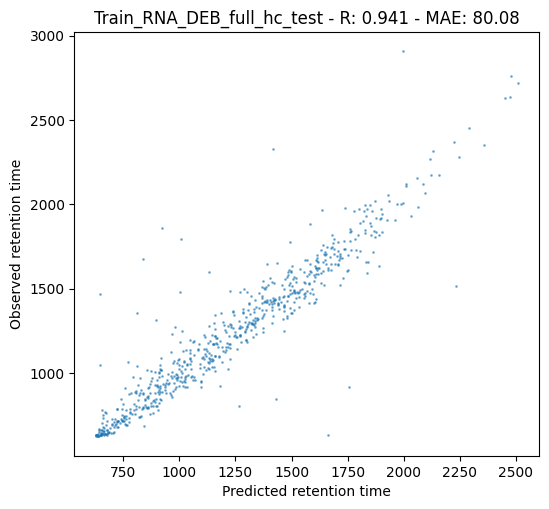

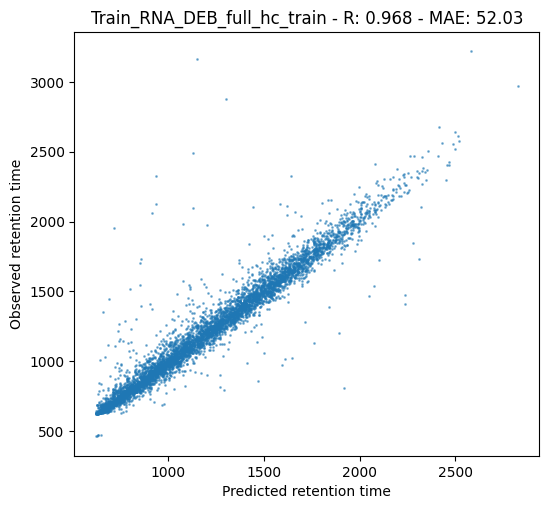

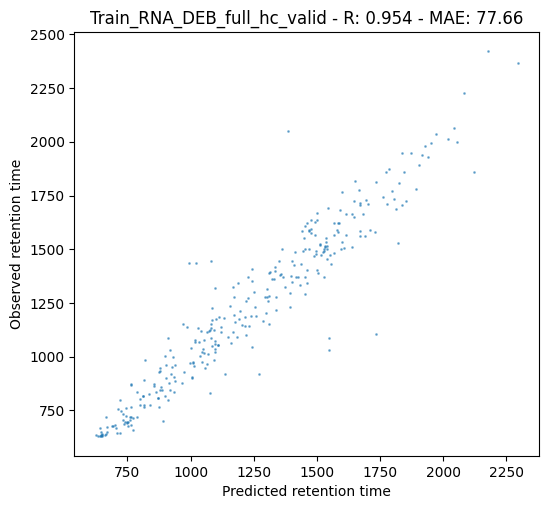

In [8]:
Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_DEB_full_hc_test.csv")
Training_plots(Train_data, "Train_RNA_DEB_full_hc_test")

Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_DEB_full_hc_train.csv")
Training_plots(Train_data, "Train_RNA_DEB_full_hc_train")

Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_DEB_full_hc_valid.csv")
Training_plots(Train_data, "Train_RNA_DEB_full_hc_valid")


X_------ PearsonRResult(statistic=0.640010851350177, pvalue=1.305023548395223e-41)
           MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  1277.389642   8419.142346      0.41  0.640312  0.5851   990.1404     349.0
X_------ PearsonRResult(statistic=0.8096074924032644, pvalue=0.0)
          MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  946.300692   6604.692458     0.655  0.809321  0.7452   525.4984    2989.0
X_------ PearsonRResult(statistic=0.6672001982781219, pvalue=1.4179883679881354e-21)
           MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  1121.925645   8170.919346     0.445  0.667083  0.6018   915.9033     157.0


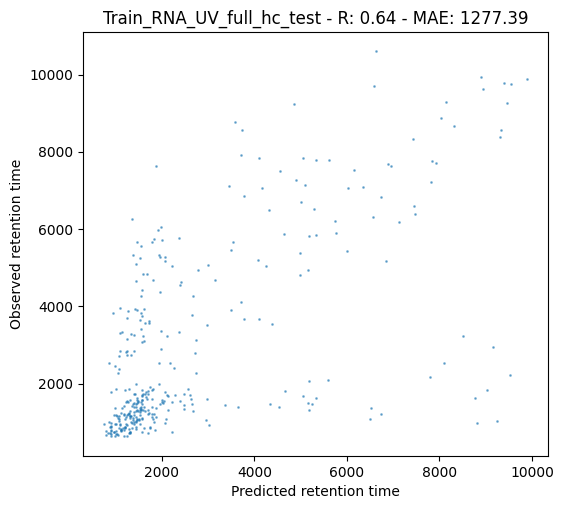

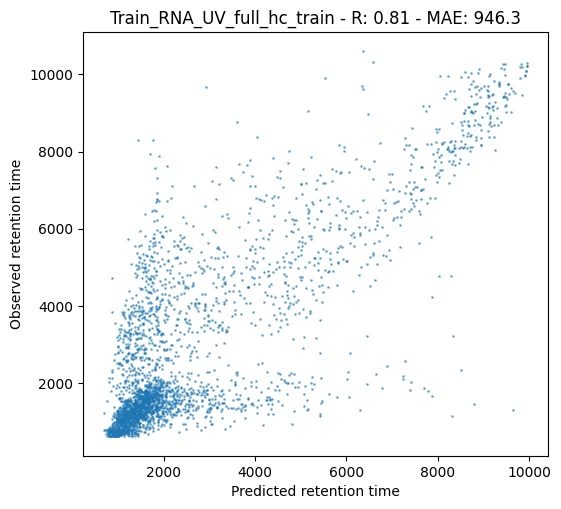

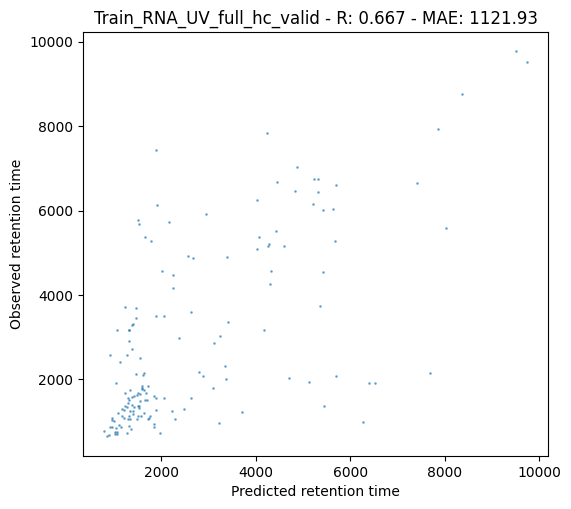

In [10]:
Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_UV_full_hc_test.csv")
Training_plots(Train_data, "Train_RNA_UV_full_hc_test")

Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_UV_full_hc_train.csv")
Training_plots(Train_data, "Train_RNA_UV_full_hc_train")

Train_data = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_UV_full_hc_valid.csv")
Training_plots(Train_data, "Train_RNA_UV_full_hc_valid")



X_------ PearsonRResult(statistic=0.9384204740328794, pvalue=2.5378352419296293e-124)
          MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  412.070709   2254.083381     0.881  0.938616  0.9142   359.6483     267.0
X_------ PearsonRResult(statistic=0.9647442830077074, pvalue=0.0)
          MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  292.426357   1695.650905     0.931  0.964883  0.9226   366.8906    2287.0
X_------ PearsonRResult(statistic=0.922761342178891, pvalue=1.0794598358690183e-50)
          MAE  perc95_calib  R_square         R   slope  intercept  test_num
0  429.088255   2520.781313     0.851  0.922497  0.8841   422.8994     120.0
2287 120 267 2674


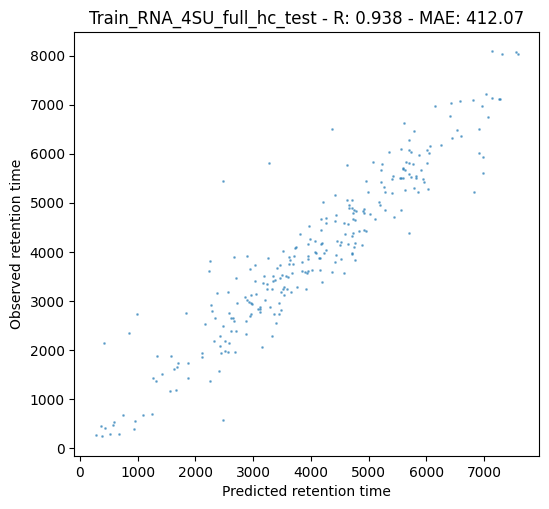

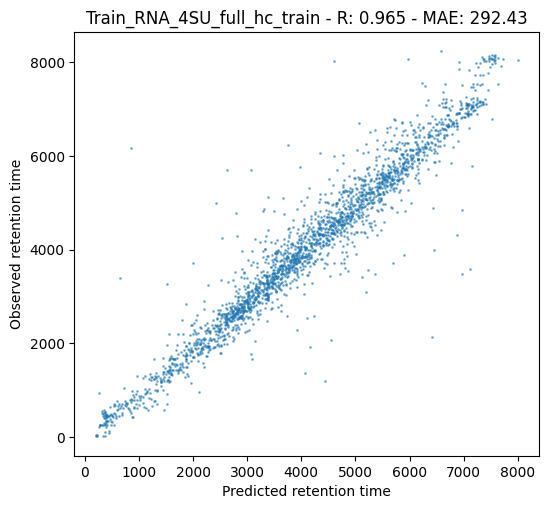

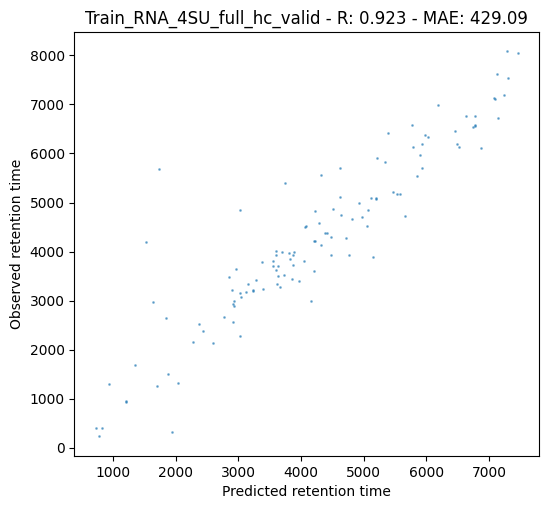

In [21]:
Train_data_test = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_4SU_full_hc_test.csv")
Training_plots(Train_data_test, "Train_RNA_4SU_full_hc_test")

Train_data_tr = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_4SU_full_hc_train.csv")
Training_plots(Train_data_tr, "Train_RNA_4SU_full_hc_train")

Train_data_v = pd.read_csv("/home/ubuntu/DeepLC/Training_Plots/Train_RNA_4SU_full_hc_valid.csv")
Training_plots(Train_data_v, "Train_RNA_4SU_full_hc_valid")

print(Train_data_tr.shape[0], Train_data_v.shape[0], Train_data_test.shape[0], Train_data_tr.shape[0] + Train_data_v.shape[0] + Train_data_test.shape[0])